<a href="https://colab.research.google.com/github/dienyaaa/significant-difference/blob/master/Significant_differences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Сравнить выборки и найти статистически значимую разницу

In [ ]:
from matplotlib import pyplot as plt
import pylab
import os
import jinja2
import pandas as pd
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import lilliefors
from statsmodels.stats.weightstats import *

In [ ]:
class Color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

# Введите исходные данные


Являются ли выборки связанными (до-после) или несвязанными (1 группа - 2 группа)

In [ ]:
dependence = input("Введите 1 или True, если выборки являются парными и 0 - если нет: ")
if dependence == '1' or dependence == 'True':
    dependence = True
else:
    dependence = False
amount = int(input("Введите число сравниваемых выборок: "))
samples_list = []
for i in range(amount):
    user_input = input(f"Введите путь к файлу с {i + 1} выборкой: ")
    parsed_data = pd.read_csv(user_input, sep=';', decimal=',', encoding="utf-8")
    data = pd.DataFrame(parsed_data)
    samples_list.append(data)
data1 = []
data2 = []
if amount == 2:
    data1 = samples_list[0]
    data2 = samples_list[1]

Введите 1 или True, если выборки являются парными и 0 - если нет: 1
Введите число сравниваемых выборок: 2
Введите путь к файлу с 1 выборкой: https://raw.githubusercontent.com/dienyaaa/significant-difference/master/input/group_before_A.csv
Введите путь к файлу с 2 выборкой: https://raw.githubusercontent.com/dienyaaa/significant-difference/master/input/group_after_A.csv


# Проверка на нормальное распределение

In [ ]:
# Shapiro-Wilk Test
def shapiro_test(input_data, alpha=0.05):
    stat, p = stats.shapiro(input_data.dropna())
    return p > alpha

In [ ]:
# D’Agostino’s K-squared test - Критерий согласия Пирсона
def pearson_test(input_data, alpha=0.05):
    stat, p = stats.normaltest(input_data.dropna())
    return p > alpha

In [ ]:
# Anderson-Darling Normality Test
def anderson_test(input_data, alpha=0.05):
    stat, p = sms.diagnostic.normal_ad(input_data.dropna())
    return p > alpha

In [ ]:
# Kolmogorov-Smirnov Test
def ks_test(input_data, alpha=0.05):
    stat, p = stats.kstest(input_data.dropna(), 'norm')
    return p > alpha

In [ ]:
# Lilliefors Test
def lilliefors_test(input_data, alpha=0.05):
    stat, p = lilliefors(input_data.dropna())
    return p > alpha

In [ ]:
def build_histogram(input_data):
    plt.figure(figsize=(15, 15))
    plt.subplot(221)
    input_data.dropna().hist(bins=20)
    plt.show()


def build_prob_plot(input_data):
    pylab.figure(figsize=(12, 8))
    pylab.subplot(2, 2, 1)
    stats.probplot(input_data.dropna(), dist="norm", plot=pylab)
    pylab.show()

In [ ]:
def normality_test(values):
    build_histogram(values)
    build_prob_plot(values)
    return (shapiro_test(values) or pearson_test(values) or
            anderson_test(values) or ks_test(values)) or lilliefors_test(values)

In [ ]:
columns = samples_list[0].columns.values.tolist()[1:]
normal_parameters = set()

Привержен к лечению


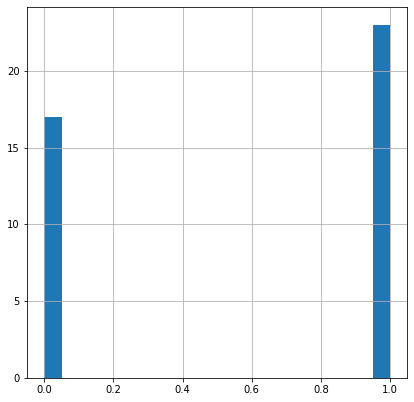

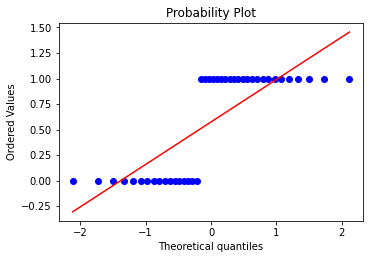

Баллы по Мориски


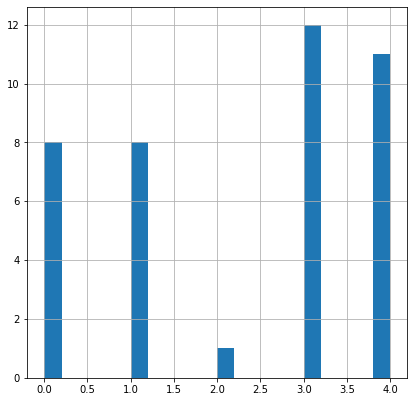

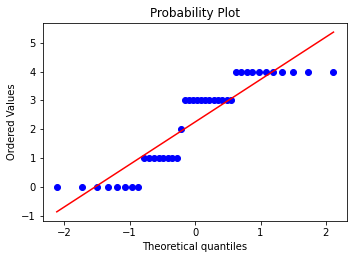

Баллы по ШОКС


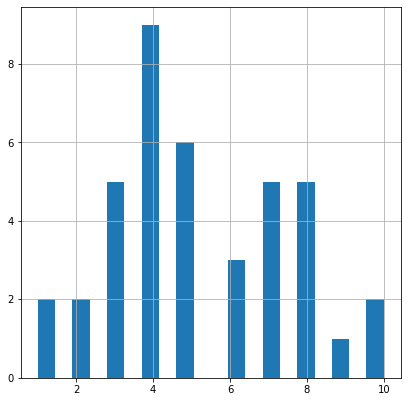

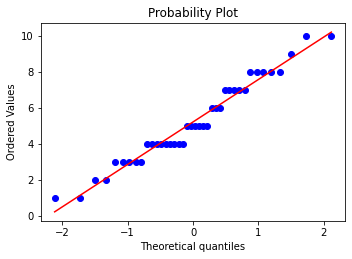

САД


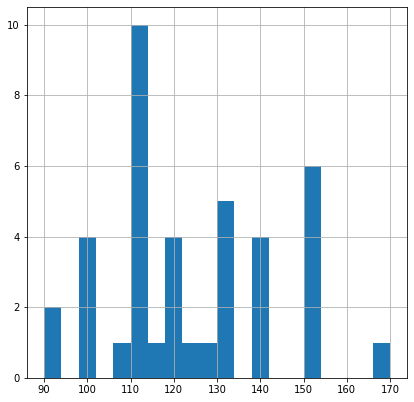

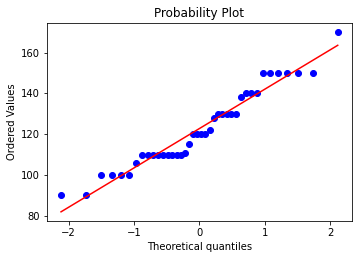

ДАД


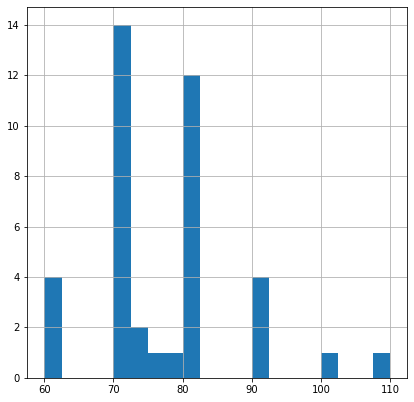

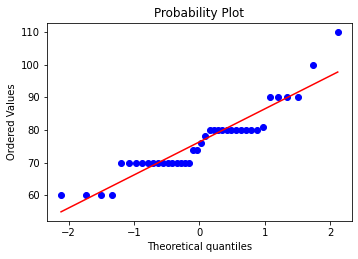

ЧСС


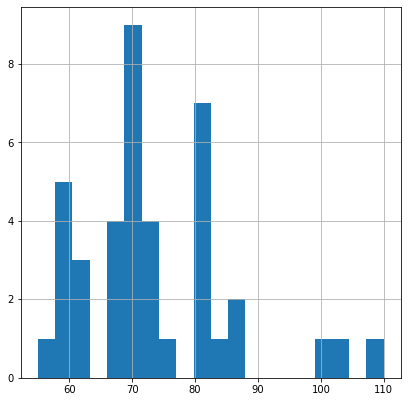

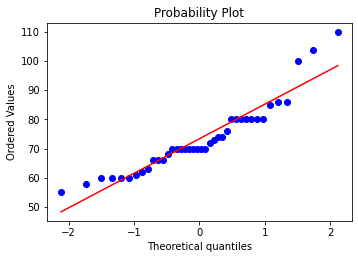

Креатинин


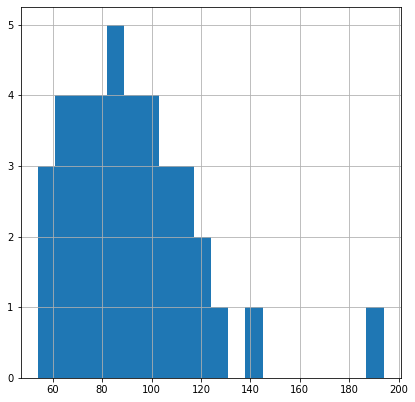

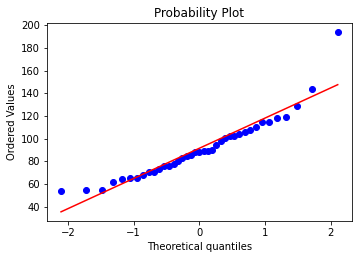

Калий


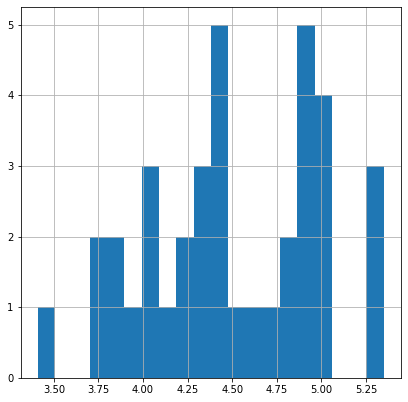

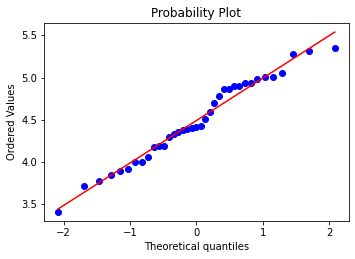

ХБП


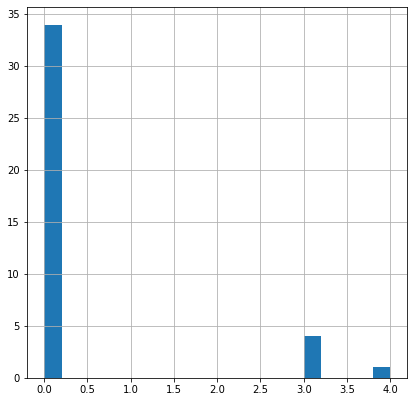

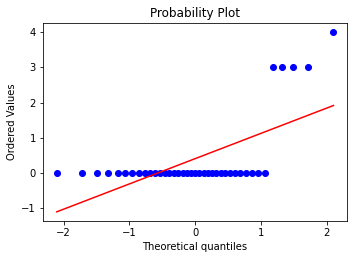

CKD-EPI


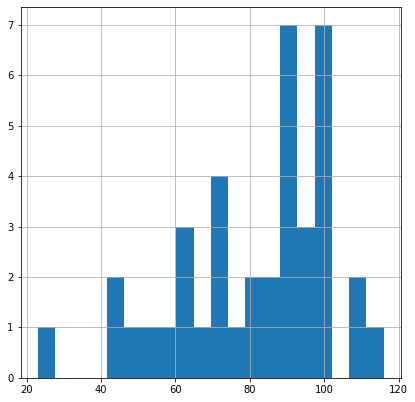

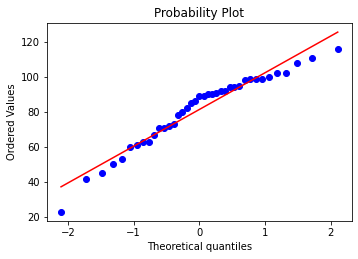

СКФ по MDRD


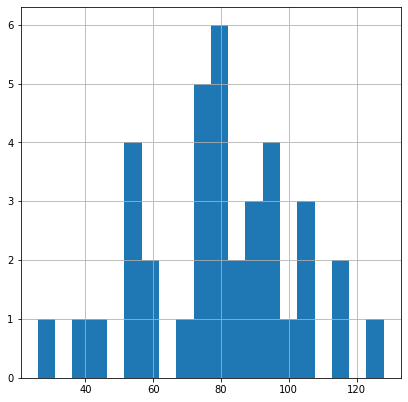

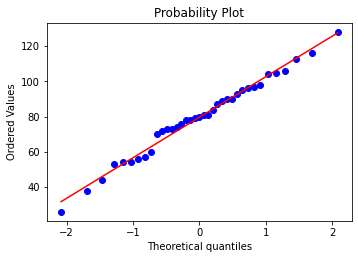

QT


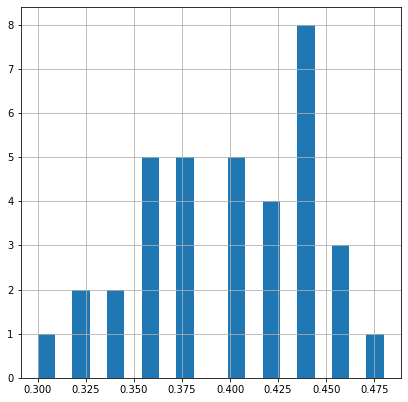

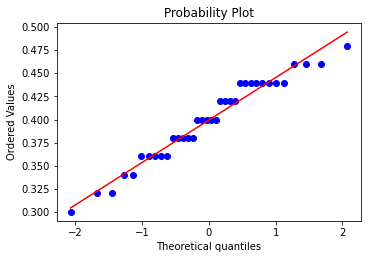

QRS


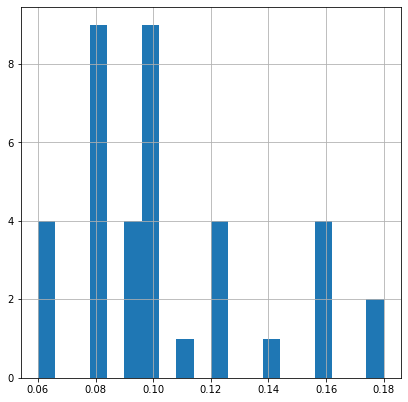

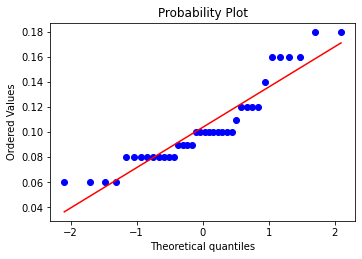

BNP


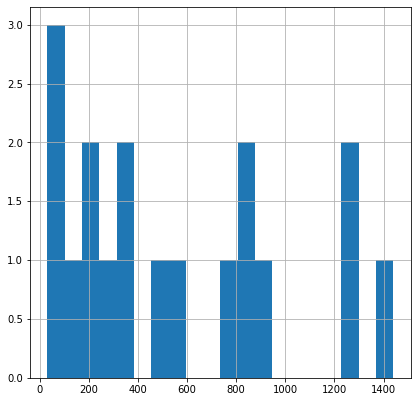

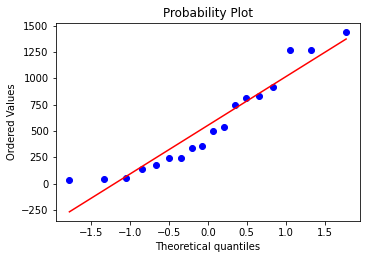

ТШХ


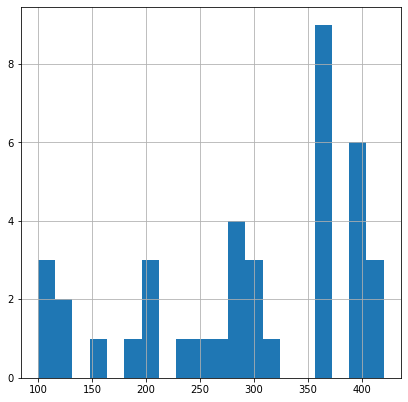

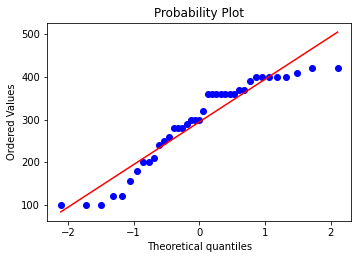

Качество жизни


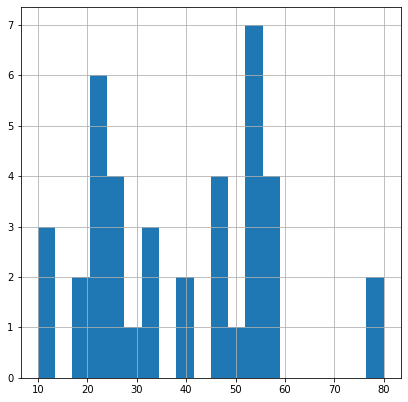

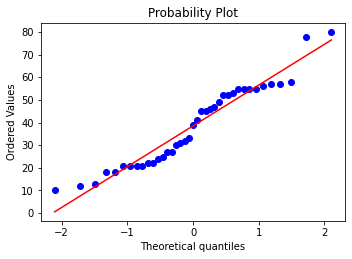

Физическая шкала


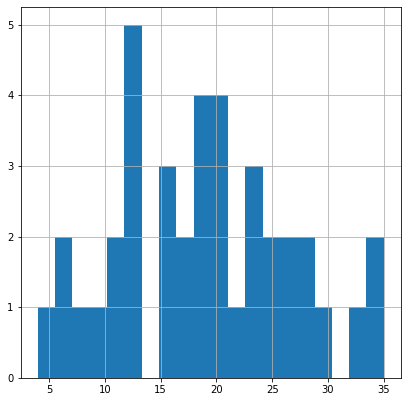

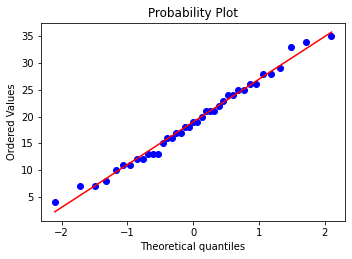

Социально-псих. шкала


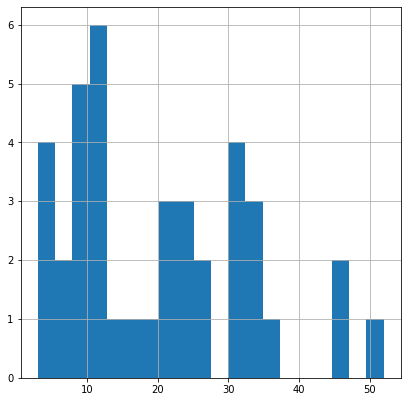

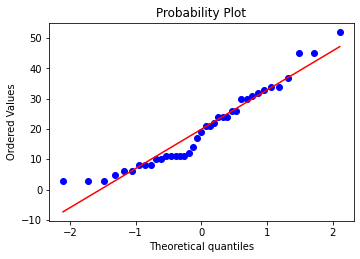

КЛАСС NYHA


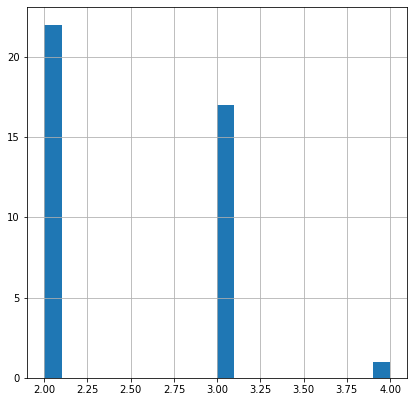

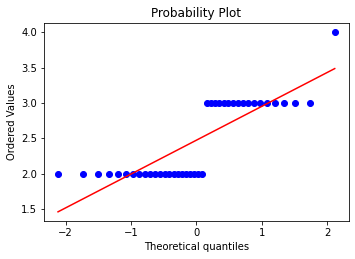

Привержен к лечению


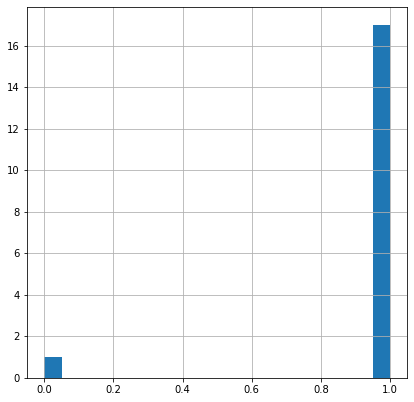

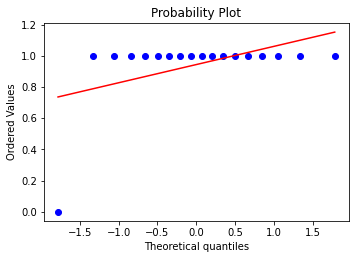

Баллы по Мориски


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


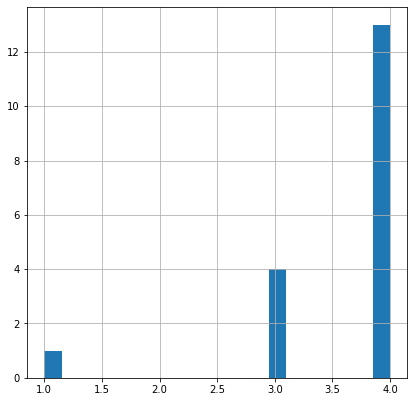

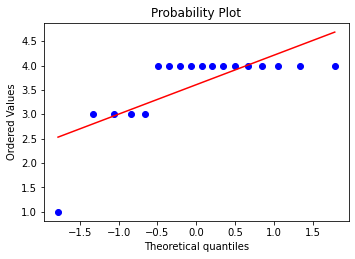

Баллы по ШОКС


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


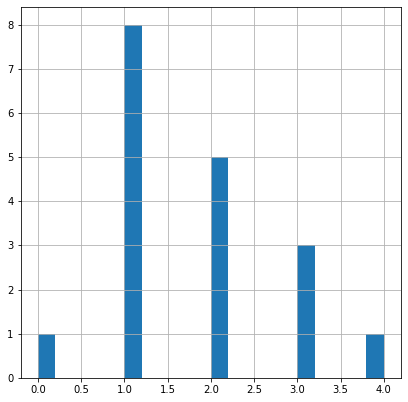

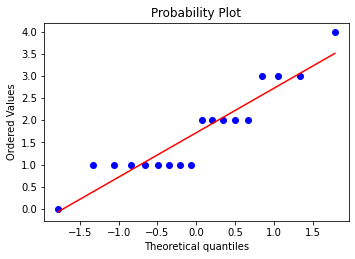

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


САД


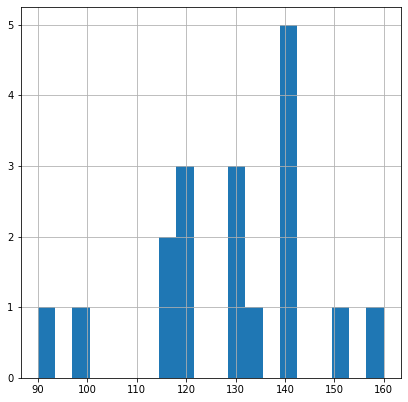

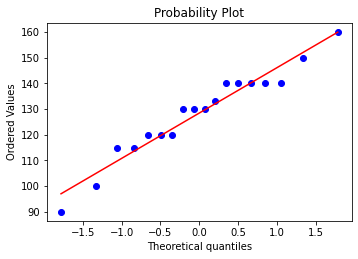

ДАД


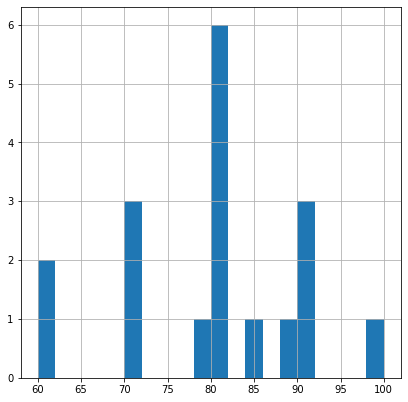

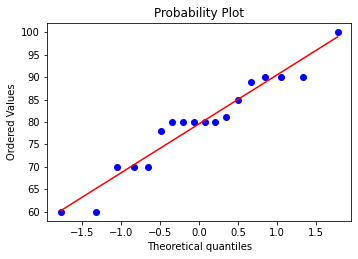

ЧСС


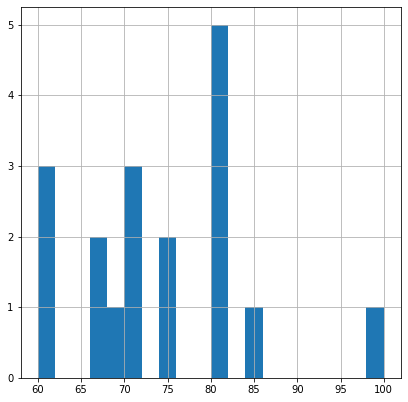

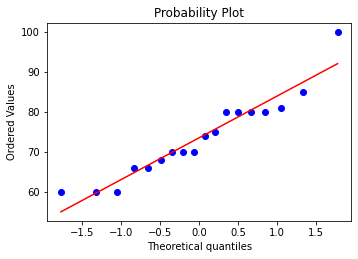

Креатинин


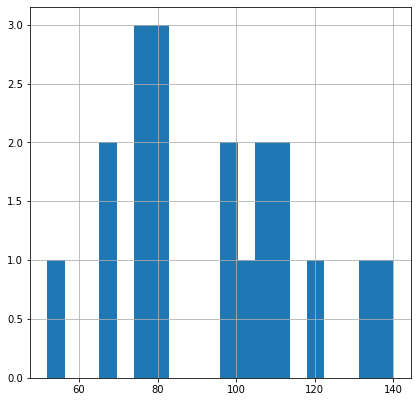

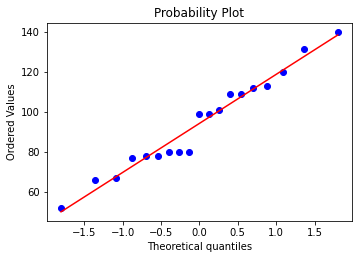

Калий


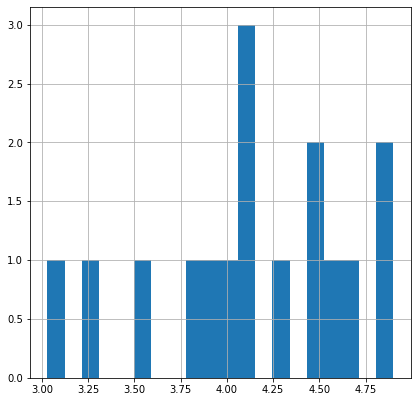

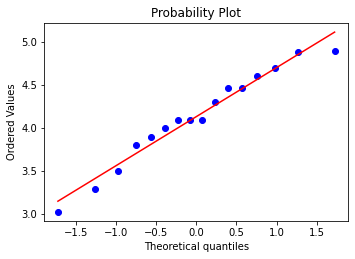

ХБП


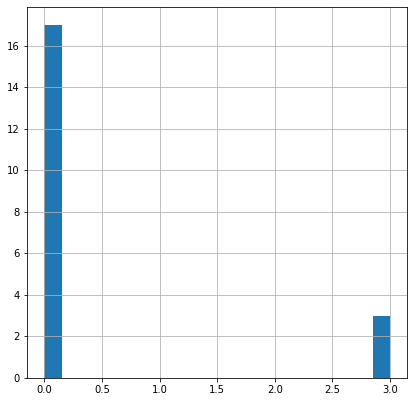

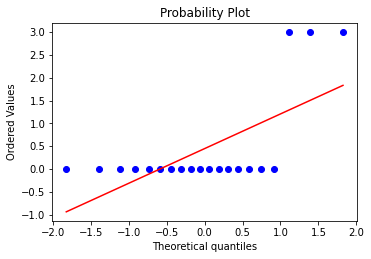

CKD-EPI


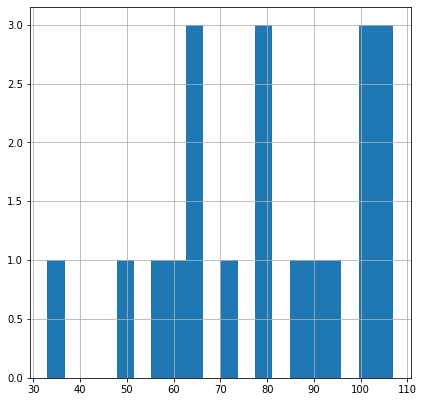

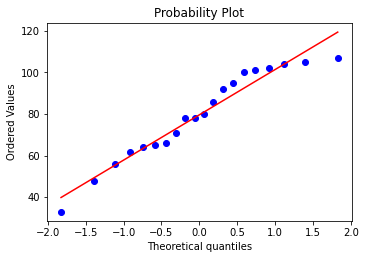

СКФ по MDRD


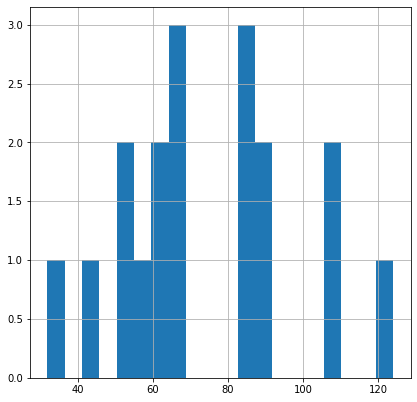

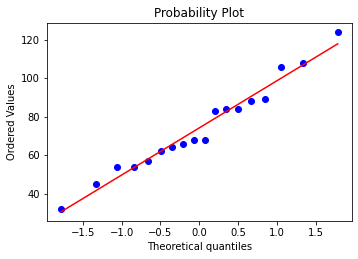

QT


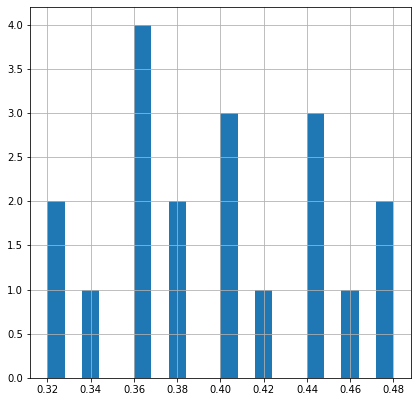

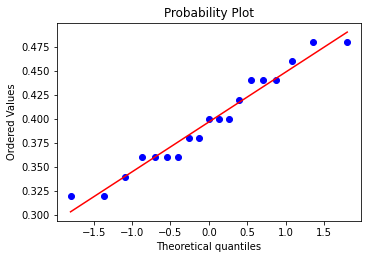

QRS


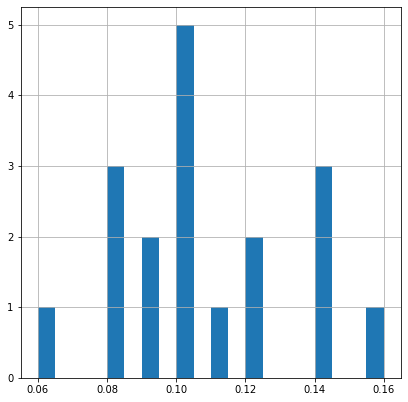

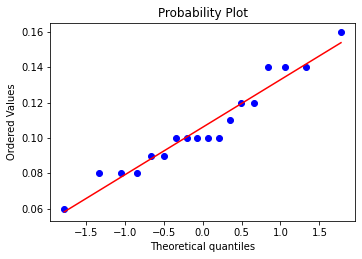

BNP


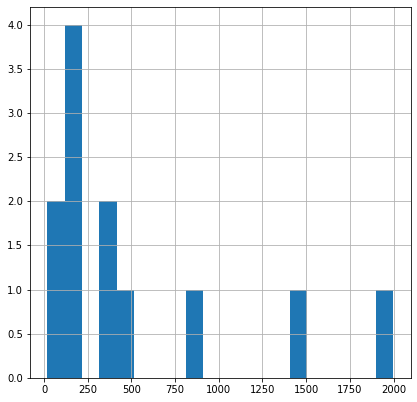

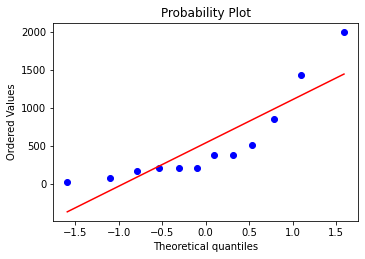

ТШХ


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


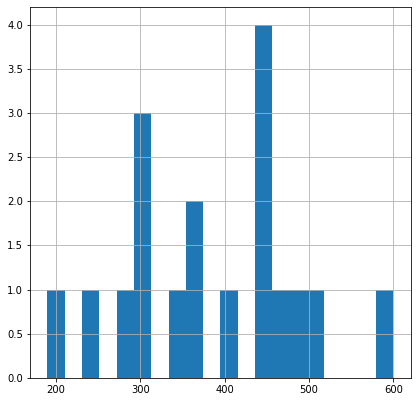

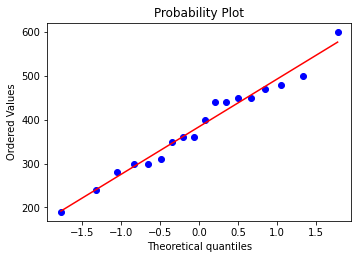

Качество жизни


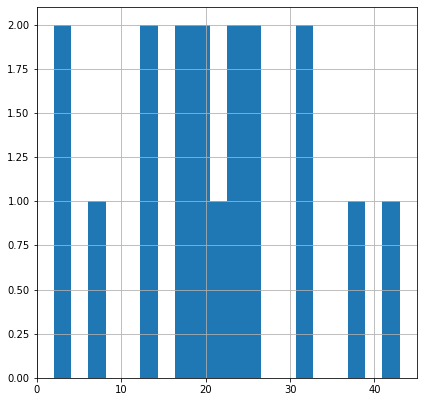

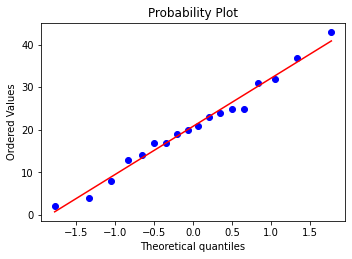

Физическая шкала


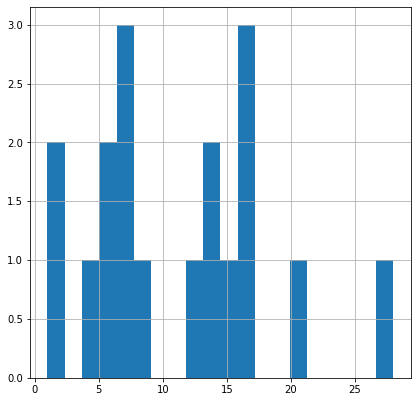

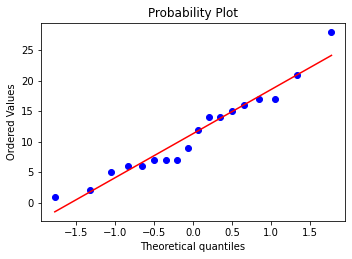

Социально-псих. шкала


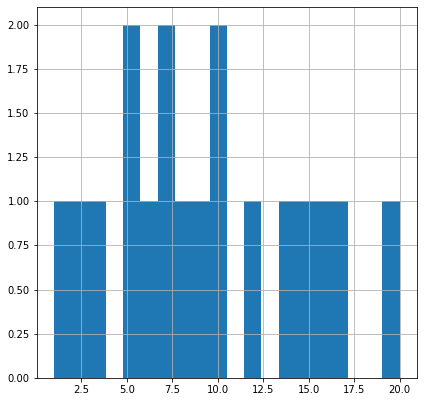

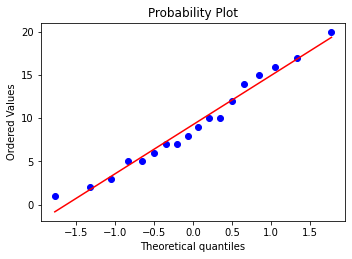

КЛАСС NYHA


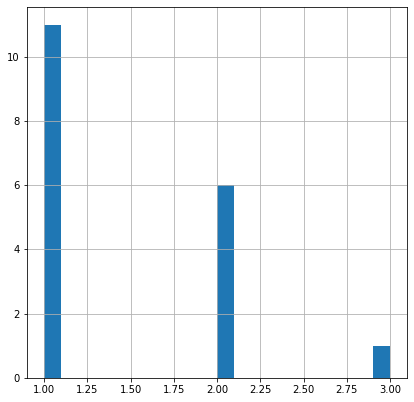

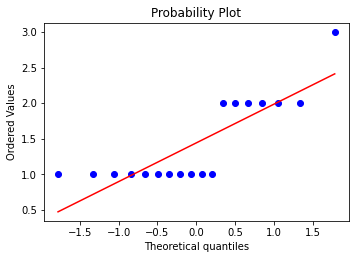

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


In [ ]:
for sample in samples_list:
    for column in columns:
        print(Color.UNDERLINE + column + Color.END)
        if normality_test(sample[column]):
            normal_parameters.add(column)

In [ ]:
print("Параметры, имеющие нормальное распределение: " + str(normal_parameters))

Параметры, имеющие нормальное распределение: {'Баллы по ШОКС', 'КЛАСС NYHA', 'ЧСС', 'QRS', 'CKD-EPI', 'Креатинин', 'СКФ по MDRD', 'ТШХ', 'Качество жизни', 'Социально-псих. шкала', 'ДАД', 'Физическая шкала', 'Калий', 'САД', 'BNP', 'QT'}


# Доверительные интервалы

In [ ]:
# функция бутстрэп
def get_bootstrap_samples(data, n_samples):
    indexes = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indexes]
    return samples

In [ ]:
# функция для расчета доверительного интервала
def stat_intervals(stat, alpha):
    boundaries = np.nanpercentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [ ]:
def bootstrap_median_confidence_interval(column_name, sample1, sample2):
    # запускаем генератор случайных чисел
    np.random.seed(0)
    # создаем по 1000 выборок и считаем на них медиану
    before_median_scores = list(map(np.nanmedian, get_bootstrap_samples(sample1[column_name].values, 1000)))
    after_median_scores = list(map(np.nanmedian, get_bootstrap_samples(sample2[column_name].values, 1000)))
    delta_median_scores = list(map(lambda x: x[0] - x[1], zip(before_median_scores, after_median_scores)))
    diff_intervals = stat_intervals(delta_median_scores, 0.05)
    # выводим доверительные интервалы
    print(f"95% доверительный интервал для {column_name} первой выборки",
          stat_intervals(before_median_scores, 0.05))
    print(f"95% доверительный интервал для {column_name} второй выборки",
          stat_intervals(after_median_scores, 0.05))
    print(f"95% доверительный интервал для разницы между медианами {column_name}", diff_intervals)
    return diff_intervals[0], diff_intervals[1]

In [ ]:
significant_diffs = set()
if amount == 2:
    for column in normal_parameters:
        print(Color.UNDERLINE + column + Color.END)
        c_m = CompareMeans(DescrStatsW(data1[column].dropna()), DescrStatsW(data2[column].dropna()))
        lower, upper = c_m.tconfint_diff(usevar='unequal')
        print(f"95% доверительный интервал: [{lower:.4f}, {upper:.4f}]")
        if not (lower <= 0 <= upper): significant_diffs.add(column)

    print(significant_diffs)

    for column in columns:
        print(Color.UNDERLINE + column + Color.END)
        lower, upper = bootstrap_median_confidence_interval(column, data1, data2)
        if not (lower <= 0 <= upper): significant_diffs.add(column)
    print(significant_diffs)

Баллы по ШОКС
95% доверительный интервал: [2.6232, 4.3824]
КЛАСС NYHA
95% доверительный интервал: [0.6843, 1.3768]
ЧСС
95% доверительный интервал: [-6.4795, 6.0073]
QRS
95% доверительный интервал: [-0.0186, 0.0143]
CKD-EPI
95% доверительный интервал: [-9.9878, 13.5083]
Креатинин
95% доверительный интервал: [-16.8121, 11.3616]
СКФ по MDRD
95% доверительный интервал: [-8.1236, 19.0305]
ТШХ
95% доверительный интервал: [-149.7180, -30.1966]
Качество жизни
95% доверительный интервал: [9.9980, 25.4122]
Социально-псих. шкала
95% доверительный интервал: [5.7912, 15.5507]
ДАД
95% доверительный интервал: [-9.3811, 2.8089]
Физическая шкала
95% доверительный интервал: [3.4707, 11.8626]
Калий
95% доверительный интервал: [0.0327, 0.6821]
САД
95% доверительный интервал: [-16.0003, 4.5003]
BNP
95% доверительный интервал: [-414.3607, 443.2557]
QT
95% доверительный интервал: [-0.0253, 0.0305]
{'КЛАСС NYHA', 'Баллы по ШОКС', 'ТШХ', 'Качество жизни', 'Социально-псих. шкала', 'Физическая шкала', 'Калий'}
П

# Критерии расчетов

In [ ]:
def ttest_ind(sample1, sample2, norm_param, alpha=0.05):
    t, p = stats.ttest_ind(sample1[norm_param], sample2[norm_param], nan_policy='omit')
    if p < alpha:
        print(Color.GREEN + "p-value: %f" % p + Color.END)
    else:
        print(Color.RED + "p-value: %f" % p + Color.END)
    return p < alpha

In [ ]:
def anova_ind(samples, norm_param, alpha=0.05):
    t, p = stats.f_oneway(samples[norm_param].dropna())
    if p < alpha:
        print(Color.GREEN + "p-value: %f" % p + Color.END)
    else:
        print(Color.RED + "p-value: %f" % p + Color.END)
    return p < alpha

In [ ]:
def mannwhitneyu(sample1, sample2, param, alpha=0.05):
    t, p = stats.mannwhitneyu(sample1[param].dropna(), sample2[param].dropna())
    if p < alpha:
        print(Color.GREEN + "p-value: %f" % p + Color.END)
    else:
        print(Color.RED + "p-value: %f" % p + Color.END)
    return p < alpha

In [ ]:
if not dependence and amount == 2:
    print("T-тест для двух независимых выборок")
    for parameter in normal_parameters:
        print(Color.UNDERLINE + parameter + Color.END)
        if ttest_ind(data1, data2, parameter):
            significant_diffs.add(parameter)
    print("Критерий Манна-Уитни для двух независимых выборок")
    for parameter in columns:
        print(Color.UNDERLINE + parameter + Color.END)
        if mannwhitneyu(data1, data2, parameter):
            significant_diffs.add(parameter)
    print("Статистически значимая разница " + str(significant_diffs))

In [ ]:
if not dependence and amount > 2:
    for parameter in normal_parameters:
        print(Color.UNDERLINE + parameter + Color.END)
        if anova_ind(samples_list, parameter):
            significant_diffs.add(parameter)

In [ ]:
if amount == 2:
    notna_data1 = pd.DataFrame(data1.dropna())
    notna_data2 = pd.DataFrame(data2.dropna())

    notna_data1 = notna_data1[notna_data1.index.isin(notna_data2.index)]
    notna_data2 = notna_data2[notna_data2.index.isin(notna_data1.index)]

In [ ]:
def ttest_rel(sample1, sample2, norm_param, alpha=0.05):
    t, p = stats.ttest_rel(sample1[norm_param], sample2[norm_param], nan_policy='omit')
    if p < alpha:
        print(Color.GREEN + "p-value: %f" % p + Color.END)
    else:
        print(Color.RED + "p-value: %f" % p + Color.END)
    return p < alpha

In [ ]:
def wilcoxon(sample1, sample2, param, alpha=0.05):
    w, p = stats.wilcoxon(sample1[param].dropna(), sample2[param].dropna())
    if p < alpha:
        print(Color.GREEN + "p-value: %f" % p + Color.END)
    else:
        print(Color.RED + "p-value: %f" % p + Color.END)
    return p < alpha

In [ ]:
if dependence and amount == 2:
    print("T-тест для двух зависимых выборок")
    for parameter in normal_parameters:
        print(Color.UNDERLINE + parameter + Color.END)
        if ttest_rel(notna_data1, notna_data2, parameter):
            significant_diffs.add(parameter)
    print("Критерий Уилкоксона парных сравнений")
    for parameter in columns:
        print(Color.UNDERLINE + parameter + Color.END)
        if wilcoxon(notna_data1, notna_data2, parameter):
            significant_diffs.add(parameter)
    print("Статистически значимая разница " + str(significant_diffs))

T-тест для двух зависимых выборок
Баллы по ШОКС
p-value: 0.001692
КЛАСС NYHA
p-value: 0.002561
ЧСС
p-value: 0.317617
QRS
p-value: 0.678310
CKD-EPI
p-value: 0.485777
Креатинин
p-value: 0.586880
СКФ по MDRD
p-value: 0.289329
ТШХ
p-value: 0.025598
Качество жизни
p-value: 0.000215
Социально-псих. шкала
p-value: 0.021029
ДАД
p-value: 0.155914
Физическая шкала
p-value: 0.033863
Калий
p-value: 0.015837
САД
p-value: 0.093305
BNP
p-value: 0.945530
QT
p-value: 0.343436
Критерий Уилкоксона парных сравнений
Привержен к лечению
p-value: 0.317311
Баллы по Мориски
p-value: 0.064978
Баллы по ШОКС
p-value: 0.010177
САД
p-value: 0.091290
ДАД
p-value: 0.150056
ЧСС
p-value: 0.324606
Креатинин
p-value: 0.759614
Калий
p-value: 0.012515
ХБП
p-value: 0.317311
CKD-EPI
p-value: 0.540555
СКФ по MDRD
p-value: 0.540555
QT
p-value: 0.317311
QRS
p-value: 0.654721
BNP
p-value: 0.386271
ТШХ
p-value: 0.020550
Качество жизни
p-value: 0.004948
Физическая шкала
p-value: 0.058182
Социально-псих. шкала
p-value: 0.034566
КЛА

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [ ]:
if amount > 2:
    output_data = []
    for sample in samples_list:
        for parameter in columns:
            mean = np.nanmean(sample[parameter])
            sem = stats.sem(sample[parameter], nan_policy='omit')
            temp_output = []
            temp_output += [parameter, f'{mean:.2f}±{sem:.2f}']
            output_data.append(temp_output)
        output_data.append(' ')
    pd.DataFrame(output_data).style.to_excel('./output/result3.xlsx', index=False, encoding="utf-8")

# Расчет разности средних двух выборок

In [ ]:
def calc_mean(sample1, sample2, diffs):
    output_data = []
    for parameter in diffs:
        mean_before = np.nanmean(sample1[parameter])
        sem_before = stats.sem(sample1[parameter], nan_policy='omit')
        mean_after = np.nanmean(sample2[parameter])
        sem_after = stats.sem(sample2[parameter], nan_policy='omit')
        delta = ((mean_after - mean_before) * 100) / mean_before
        temp_output = []
        temp_output += [parameter, f'{mean_before:.2f}±{sem_before:.2f}', f'{mean_after:.2f}±{sem_after:.2f}',
                        f'{delta:.2f}']
        output_data.append(temp_output)
    return output_data

In [ ]:
diffs = set(columns) - significant_diffs

In [ ]:
if not os.path.exists('output'):
    os.mkdir("output")

In [ ]:
if amount == 2:
    output_df1 = pd.DataFrame(calc_mean(data1, data2, significant_diffs))
    output_df2 = pd.DataFrame(calc_mean(data1, data2, diffs))
    output_df = pd.concat([output_df1, pd.DataFrame([' ']), output_df2])
    output_df.style.to_excel('./output/result1.xlsx', index=False, encoding="utf-8",
                             header=['Параметры', '1 группа', '2 группа', 'разница'])

# Результат

In [ ]:
output_df.style

,0,1,2,3
0,КЛАСС NYHA,2.48±0.09,1.44±0.15,-41.64
1,Баллы по ШОКС,5.22±0.37,1.72±0.24,-67.04
2,ТШХ,294.49±16.23,384.44±24.46,30.55
3,Качество жизни,38.54±2.88,20.83±2.54,-45.94
4,Социально-псих. шкала,19.95±2.07,9.28±1.28,-53.49
5,Баллы по Мориски,2.25±0.24,3.61±0.18,60.49
6,Физическая шкала,19.00±1.24,11.33±1.65,-40.35
7,Калий,4.49±0.08,4.13±0.14,-7.96
0,,nan,nan,nan
0,QRS,0.10±0.01,0.11±0.01,2.08
